### 1.1.1 Пример

Пусть дана начальная популяция из четырех хромосом с двумя  
генами x и y. Показатель качества хромосомы оценивается функцией Z.  
При равном качестве хромосом предпочтение отдается хромосоме с  
большим номером. На каждом этапе хромосома a с высшим качеством  
порождает четыре новых хромосомы 𝑏1 , 𝑐1 , 𝑏2 , 𝑐2 , обмениваясь генами с  
двумя хромосомами b и c более низкого качества по указанной схеме:  
![](wb6p1.jpg)
Последняя хромоcома (с низшим качеством) выбывает из  
популяции. Найти максимальный показатель качества хромосомы в  
популяции и общее качество популяции после четырех этапов эволюции.

In [16]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x**2 + 3 * y**2 + 1)

# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

# запрограммируем представленную выше схему обмена хоромосомами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    X[1] = oldX[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    
    return X, Y

# Отсортируем массив качества наших потомков и выделим полученнные индексы
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: [k])
    
    return sortedId

# Напишем функцию для шага эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

# шаги эволюции (конечная фукнция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results

# Теперь, когда мы подготовились к решению задачи, написав все  
# необходимые функции для реализации генетического алгоритма (оценки  
# качества хромосом, сортировки потомков и эволюционных шагов), решим  
# задачу в числах. Пусть даны следующие массивы хромосом X и Y:

# объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

# Реализация алгоритма
results = evoSteps(X, Y)

# Теперь, выведем полученные значения для показателя качества хромосомы  
# в популяции и общее качество популяции после четырех этапов эволюции.  
# Для этого, воспользуемся циклом по значениям переменной results.

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z:       {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 2.4615384615384617
max_3_step: 3.5384615384615383
max_4_step: 4.0
max Z:       1.0


### Задание

Выполните по вариантам соответственно реализацию генетического  
алгоритма в соответствии с приложенными начальными данными.
![](wb6p2.jpg)

### 1.2.1 Пример

Итак, начальные условия задачи представляют собой следующий граф с  
расстояниями между ребрами:
![](wb6p3.jpg)

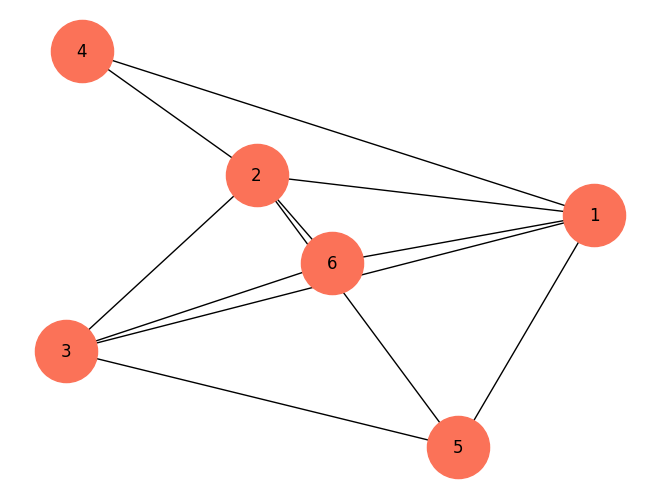

Лучший выбранный маршрут: [1, 3, 2, 6, 4, 5, 1]
Длина лучшего выбранного маршрута: 114
Длины всех рассмотренныз маршрутов: [166, 187, 179, 130, 114]


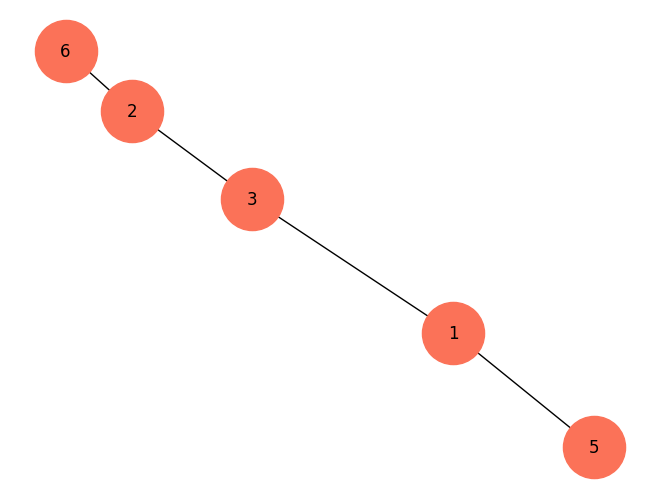

In [40]:
# импортируем библиотеки
import networkx as nx
from math import e
import matplotlib.pyplot as plt

# Далее, опишем массив длин ребер, последовательности прохождение
# вершин на маршруте и их замены, значения P, а также начальную
# температуру:
distances = [(1, 2, 20),
             (1, 3, 40),
             (1, 4, 42),
             (1, 5, 33),
             (1, 6, 21),
             (2, 3, 26),
             (2, 4, 38),
             (2, 5, 42),
             (2, 6, 17),
             (2, 4, 22),
             (3, 5, 43),
             (3, 6, 21),
             (3, 5, 27),
             (3, 6, 22),
             (3, 6, 26),] # длины ребер

V = [1, 4, 5, 2, 6, 3, 1] # последоватлеьность прохождения маршрута
Z = [(3, 4),
    (4, 5),
    (5, 2),
    (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

# Запишем функции вероятности и изменения температуры:

# функция вероятности
def probability(delta, T):
    return 100 * e**(-delta / T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextT

# Построим граф по заданным вершинам, как в начальном условии:

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeReplacement(V, z)
    return V

# Построим граф по заданным вершинам, как в начальном условии:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # доставление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
plt.show()

# Теперь, напишем необходимые, согласно алгоритму выше, функции для
# работы метода имитации отжига. Вычислим длину ребра:

# Вычисление длины ребра
def edgeLength(i, j, destances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in destances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# Вычислим длину маршрута:
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

# Запишем функцию для однократной перестановки в пути:
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

# А теперь функцию, для реализации непосредственно самой перестановки:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, Z)
    return V

# Теперь, опишем алгоритм выбора подходящего пути методом отжига:

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршруов
        
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчет вероятности
            
            # если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
        
    return V, arrSum

# И нарисуем наш граф, отвечающий заданному маршруту:

# отрисовка графа по заданному маршруту
def drawRouteGraph(destances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
                
    graph = nx.Graph() # создание пустого графа
    
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
    plt.show()
    
# И, наконец, рассчитаем наилучший маршрут и его длину:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренныз маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

### Задание

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех  
циклов решения задачи методом отжига по варианту ниже.
![](wb6p4.jpg)

### Задание*

На решенном уже примере поэкспериментируйте с показателем S,  
проанализируйте результаты.